# Inlezen packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn import linear_model
import matplotlib.ticker as mtick

import statsmodels.api as sm
import statistics


Input = 'Input21'
output = 'Output18'

colors2 = ['#6CC24A','#FFB81C', '#A50034'] # groen geel rood
colors3 = ['#A50034','#FFB81C', '#6CC24A'] # groen geel rood

## Alle datasets - multiple regressie (apart)

In [2]:
GB = pd.read_csv(f'1_Input/{Input}/GB.csv', index_col=0)
USA = pd.read_csv(f'1_Input/{Input}/USA.csv', index_col=0)
FR = pd.read_csv(f'1_Input/{Input}/FR.csv', index_col=0)
BE = pd.read_csv(f'1_Input/{Input}/BE.csv', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl_USA = ['1981 - 1989', '1990 - 1999', '2000 - 2009']
yrsl_be = ['1999 - 2008', '2009 - 2018']
yrsl_fr = ['1989 - 1998', '1999 - 2008', '2009 - 2018']


yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

GB_n = len(GB)
USA_n = len(USA)
BE_n = len(BE)
FR_n = len(FR)
n_total = GB_n + USA_n + BE_n + FR_n

print(n_total)

287


In [3]:
GB2 = pd.DataFrame()
USA2 = pd.DataFrame()
BE2 = pd.DataFrame()
FR2 = pd.DataFrame()

datasets2 = [GB2, USA2, BE2, FR2]


for u in range(len(datasets)):
    dataset = datasets[u]
    dataset2 = datasets2[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                idx = dataset.index[i]

                dataset2.loc[f'{idx} {yrsl[j]}',[f'EI deviation']] = catch_dat[f'EI deviation {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'AI']] = catch_dat[f'AI {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'AI_change']] = catch_dat[f'AI_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa']] = catch_dat[f'Pa {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa_change']] = catch_dat[f'Pa_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa']] = catch_dat[f'Epa {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa_change']] = catch_dat[f'Epa_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'T']] = catch_dat[f'T {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'T_change']] = catch_dat[f'T_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'SI']] = catch_dat[f'SI {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'SI_change']] = catch_dat[f'SI_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'ST']] = catch_dat[f'ST {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'ST_change']] = catch_dat[f'ST_change {yrsl[j]}']

                dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur']] = catch_dat[f'is_dur {yrsl[j]}']
                dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur_change']] = catch_dat[f'is_dur_change {yrsl[j]}']
    
# display(datasets2[0])
# display(datasets2[1])
# display(datasets2[2])
# display(datasets2[3])

### Samenvoegen van Meuse datasets

In [4]:
ME = FR2.append(BE2)

C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_19336\3450833402.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ME = FR2.append(BE2)


In [5]:
datasets3 = datasets2[0], datasets2[1], ME

In [6]:
for u in range(len(datasets3)):
    dataset3 = datasets3[u]
    
    print(u)
    
    x = dataset3[['AI','AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']]
    y = dataset3['EI deviation']
 
    # # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)

# # with statsmodels
    x = sm.add_constant(x) # adding a constant
 
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x)  
 
    print_model = model.summary()
    print(print_model)

0
Intercept: 
 -0.00379112493116571
Coefficients: 
 [-1.96982382e-02  1.98954408e-01  1.84324848e-05  9.13520023e-05
 -1.04373645e-04 -4.72739377e-04 -3.11291972e-04  3.94891554e-02
 -2.47380022e-01  1.43687258e-01  9.00901290e-02 -3.42460880e-02
  2.37276834e-02 -2.11400930e-02]
                            OLS Regression Results                            
Dep. Variable:           EI deviation   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.585
Date:                Wed, 08 Feb 2023   Prob (F-statistic):             0.0829
Time:                        08:23:14   Log-Likelihood:                 566.62
No. Observations:                 285   AIC:                            -1103.
Df Residuals:                     270   BIC:                            -1048.
Df Model:                          14                                         
Covarian

## Alle datasets - multiple regressie (apart)

In [7]:
total = pd.DataFrame()

for u in range(len(datasets3)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                idx = dataset.index[i]

                total.loc[f'{idx} {yrsl[j]}',[f'EI deviation']] = catch_dat[f'EI deviation {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'AI']] = catch_dat[f'AI {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'AI_change']] = catch_dat[f'AI_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'Pa']] = catch_dat[f'Pa {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'Pa_change']] = catch_dat[f'Pa_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'Epa']] = catch_dat[f'Epa {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'Epa_change']] = catch_dat[f'Epa_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'T']] = catch_dat[f'T {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'T_change']] = catch_dat[f'T_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'SI']] = catch_dat[f'SI {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'SI_change']] = catch_dat[f'SI_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'ST']] = catch_dat[f'ST {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'ST_change']] = catch_dat[f'ST_change {yrsl[j]}']

                total.loc[f'{idx} {yrsl[j]}',[f'is_dur']] = catch_dat[f'is_dur {yrsl[j]}']
                total.loc[f'{idx} {yrsl[j]}',[f'is_dur_change']] = catch_dat[f'is_dur_change {yrsl[j]}']

In [8]:
x = total[['AI','AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']]
y = total['EI deviation']
 
# # with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.007847164337776638
Coefficients: 
 [-4.69708345e-03  1.88800307e-02  2.24173420e-06  5.69768754e-05
  4.34182303e-05  4.57259623e-04  1.50351767e-05 -2.68851695e-02
 -3.78849690e-02 -7.20181580e-02  2.20743965e-02  4.79088551e-02
 -1.98908844e-03  2.02450555e-02]
                            OLS Regression Results                            
Dep. Variable:           EI deviation   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7.064
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.20e-13
Time:                        08:23:19   Log-Likelihood:                 1195.0
No. Observations:                 636   AIC:                            -2360.
Df Residuals:                     621   BIC:                            -2293.
Df Model:                          14                                         
Covarianc

In [9]:
# Rearrange dataset
yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl = yrsl_GB



dataset = GB
dataset2 = pd.DataFrame()


for j in range(len(yrsl)):
    if j > 0:            
        for i in range(len(dataset)):
            catch_dat = dataset.iloc[i]
            idx = dataset.index[i]

            
            # AI = 
            dataset2.loc[f'{idx} {yrsl[j]}',[f'EI deviation']] = catch_dat[f'EI deviation {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'AI']] = catch_dat[f'AI {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'AI_change']] = catch_dat[f'AI_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa']] = catch_dat[f'Pa {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Pa_change']] = catch_dat[f'Pa_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa']] = catch_dat[f'Epa {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'Epa_change']] = catch_dat[f'Epa_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'T']] = catch_dat[f'T {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'T_change']] = catch_dat[f'T_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'SI']] = catch_dat[f'SI {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'SI_change']] = catch_dat[f'SI_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'ST']] = catch_dat[f'ST {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'ST_change']] = catch_dat[f'ST_change {yrsl[j]}']
            
            dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur']] = catch_dat[f'is_dur {yrsl[j]}']
            dataset2.loc[f'{idx} {yrsl[j]}',[f'is_dur_change']] = catch_dat[f'is_dur_change {yrsl[j]}']


display(dataset2)
        

,EI deviation,AI,AI_change,Pa,Pa_change,Epa,Epa_change,T,T_change,SI,SI_change,ST,ST_change,is_dur,is_dur_change
17005 1981 - 1990,-0.045627,0.442500,-0.084804,1052.421,161.746556,465.695896,-3.960023,7.798587,-0.071023,0.277394,0.076554,0.230643,0.065244,3.371476,-0.235113
18001 1981 - 1990,0.002218,0.303739,-0.047344,1483.885,185.778333,450.713720,-5.029504,7.185628,-0.077314,0.297603,0.071845,0.195348,0.041786,3.244828,-0.240082
20007 1981 - 1990,0.038489,0.587754,-0.070139,786.363,85.604111,462.188052,1.163767,7.411265,-0.020448,0.114182,-0.016608,0.083962,0.084706,3.545872,-0.526786
21017 1981 - 1990,-0.026236,0.249819,-0.031713,1842.114,204.094000,460.194673,-0.959876,6.119146,-0.050675,0.266387,0.023459,0.194242,0.071810,3.068662,-0.094445
21023 1981 - 1990,-0.033454,0.734478,-0.074405,679.225,68.713889,498.875745,5.044034,8.277074,0.003274,0.151241,0.021637,0.054610,0.036327,3.800000,-0.491016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79002 2001 - 2010,0.016545,0.302783,0.004979,1589.017,-11.518000,481.127222,4.482080,7.951944,0.270049,0.254649,-0.037868,0.175066,0.060675,3.137112,-0.249607
79004 2001 - 2010,-0.001616,0.271475,-0.004558,1807.637,48.660000,490.727659,5.192103,7.826819,0.269182,0.266863,-0.038879,0.202972,0.087573,3.257885,-0.130577
8009 2001 - 2010,-0.013798,0.388700,-0.004459,1099.728,25.302000,427.463943,5.043752,6.225423,0.292321,0.212336,0.012951,0.122853,0.043948,2.928571,-0.303907
93001 2001 - 2010,-0.003558,0.152086,0.013494,2740.187,-184.649000,416.743417,11.384819,6.991667,0.268507,0.307330,-0.000643,0.169855,0.060188,2.752155,-0.224535


In [10]:
x = dataset2[['AI','AI_change', 'Pa', 'Pa_change', 'Epa', 'Epa_change', 'T', 'T_change', 'SI', 'SI_change', 'ST', 'ST_change', 'is_dur', 'is_dur_change']]
y = dataset2['EI deviation']
 
# # with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.00379112493116571
Coefficients: 
 [-1.96982382e-02  1.98954408e-01  1.84324848e-05  9.13520023e-05
 -1.04373645e-04 -4.72739377e-04 -3.11291972e-04  3.94891554e-02
 -2.47380022e-01  1.43687258e-01  9.00901290e-02 -3.42460880e-02
  2.37276834e-02 -2.11400930e-02]
                            OLS Regression Results                            
Dep. Variable:           EI deviation   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.585
Date:                Wed, 08 Feb 2023   Prob (F-statistic):             0.0829
Time:                        08:23:22   Log-Likelihood:                 566.62
No. Observations:                 285   AIC:                            -1103.
Df Residuals:                     270   BIC:                            -1048.
Df Model:                          14                                         
Covariance

## Verder met statistische testen

### Checken normaliteit

#### EI deviations in array zetten

In [11]:
EI_dev_total = [[], [], []] 

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                if u == 0 or u == 1:
                    EI_dev_total[u].append(EI_dev)
                elif u == 2 or u == 3:
                    EI_dev_total[2].append(EI_dev)

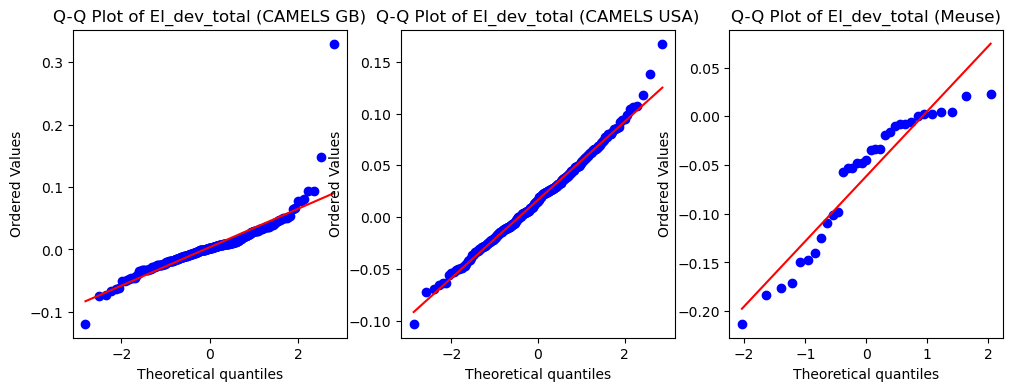

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Loop through the arrays in EI_dev_total
for i, data in enumerate(EI_dev_total):
    # Create the Q-Q plot for the current array
    probplot(data, plot=axs[i])
    # Add a title to the current subplot
    axs[i].set_title(f"Q-Q Plot of EI_dev_total ({dataset_names[i]})")

# Show the figure
plt.show()

In [13]:
from scipy.stats import shapiro

# Loop through the arrays in EI_dev_total
for i, data in enumerate(EI_dev_total):
    # Perform the Shapiro-Wilk test for normality
    stat, p = shapiro(data)
    print(f"\nDataset: {dataset_names[i]}\nShapiro-Wilk test")
    print(f"Test statistic: {stat:.4f}")
    print(f"p-value: {p:.4f}\n")
    
print("In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the less likely the sample data is to be normally distributed. The p-value is then calculated from the W statistic, and if the p-value is less than a pre-specified significance level (e.g., 0.05), we reject the null hypothesis that the sample data is normally distributed.")


Dataset: CAMELS GB
Shapiro-Wilk test
Test statistic: 0.7982
p-value: 0.0000


Dataset: CAMELS USA
Shapiro-Wilk test
Test statistic: 0.9938
p-value: 0.1817


Dataset: Meuse
Shapiro-Wilk test
Test statistic: 0.8945
p-value: 0.0038

In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the less likely the sample data is to be normally distributed. The p-value is then calculated from the W statistic, and if the p-value is less than a pre-specified significance level (e.g., 0.05), we reject the null hypothesis that the sample data is normally distributed.


In [14]:
EI_dev_GB_80 = []
EI_dev_GB_90 = []
EI_dev_GB_00 = []
EI_dev_USA_90 = []
EI_dev_USA_00 = []
EI_dev_Meuse_90 = []
EI_dev_Meuse_00 = []

EI_dev_total_decades = EI_dev_GB_80, EI_dev_GB_90, EI_dev_GB_00, EI_dev_USA_90, EI_dev_USA_00, EI_dev_Meuse_90, EI_dev_Meuse_00
EI_dev_total_decades_names = "EI_dev_GB_80", "EI_dev_GB_90", "EI_dev_GB_00", "EI_dev_USA_90", "EI_dev_USA_00", "EI_dev_Meuse_90", "EI_dev_Meuse_00"


for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                if u == 0:
                    if j == 1:
                        EI_dev_GB_80.append(EI_dev)
                    if j == 2:
                        EI_dev_GB_90.append(EI_dev)
                    if j == 3:
                        EI_dev_GB_00.append(EI_dev)
                if u == 1:
                    if j == 1:
                        EI_dev_USA_90.append(EI_dev)
                    if j == 2:
                        EI_dev_USA_00.append(EI_dev)
                if u == 2:
                    EI_dev_Meuse_00.append(EI_dev)
                if u == 3:
                    if j == 1:
                        EI_dev_Meuse_90.append(EI_dev)
                    if j == 2:
                        EI_dev_Meuse_00.append(EI_dev)

In [15]:
from scipy.stats import shapiro

# Loop through the arrays in EI_dev_total
for i, data in enumerate(EI_dev_total_decades):
    # Perform the Shapiro-Wilk test for normality
    stat, p = shapiro(data)
    print(f"\nDataset: {EI_dev_total_decades_names[i]}\nShapiro-Wilk test")
    print(f"Test statistic: {stat:.4f}")
    print(f"p-value: {p:.4f}\n")
    
print("In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the less likely the sample data is to be normally distributed. The p-value is then calculated from the W statistic, and if the p-value is less than a pre-specified significance level (e.g., 0.05), we reject the null hypothesis that the sample data is normally distributed.")


Dataset: EI_dev_GB_80
Shapiro-Wilk test
Test statistic: 0.6562
p-value: 0.0000


Dataset: EI_dev_GB_90
Shapiro-Wilk test
Test statistic: 0.9637
p-value: 0.0098


Dataset: EI_dev_GB_00
Shapiro-Wilk test
Test statistic: 0.9453
p-value: 0.0006


Dataset: EI_dev_USA_90
Shapiro-Wilk test
Test statistic: 0.9917
p-value: 0.4420


Dataset: EI_dev_USA_00
Shapiro-Wilk test
Test statistic: 0.9865
p-value: 0.1041


Dataset: EI_dev_Meuse_90
Shapiro-Wilk test
Test statistic: 0.9311
p-value: 0.4587


Dataset: EI_dev_Meuse_00
Shapiro-Wilk test
Test statistic: 0.9451
p-value: 0.2315

In the Shapiro-Wilk test for normality, the test statistic is a measure of how well the sample data fits a normal distribution. The null hypothesis for the test is that the sample data is normally distributed. The test statistic is calculated as the W statistic, which is a measure of the deviation between the sample data and a normal distribution. The larger the value of the W statistic, the greater the deviation and the 

## Wilcoxon Signed rank

In [16]:
from scipy.stats import wilcoxon

# Compare EI_dev_GB_80 and EI_dev_GB_90
stat, p = wilcoxon(EI_dev_GB_80, EI_dev_GB_90)
print("\nComparing EI_dev_GB_80 and EI_dev_GB_90")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_GB_90 and EI_dev_GB_00
stat, p = wilcoxon(EI_dev_GB_90, EI_dev_GB_00)
print("\nComparing EI_dev_GB_90 and EI_dev_GB_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_USA_90 and EI_dev_USA_00
stat, p = wilcoxon(EI_dev_USA_90, EI_dev_USA_00)
print("\nComparing EI_dev_USA_90 and EI_dev_USA_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# # Compare EI_dev_Meuse_90 and EI_dev_Meuse_00
# stat, p = wilcoxon(EI_dev_Meuse_90, EI_dev_Meuse_00)
# print("\nComparing EI_dev_Meuse_90 and EI_dev_Meuse_00")
# print(f"Test statistic: {stat:.4f}")
# print(f"p-value: {p:.4f}\n")

print("The test statistic is a value that represents the difference between the two samples. In the case of the Wilcoxon rank-sum test, the test statistic is the sum of the ranks of the sample from the first group (e.g., EI_dev_GB_80) in the combined sample of both groups (EI_dev_GB_80 and EI_dev_GB_90). A larger test statistic indicates that there is a larger difference between the two samples.")

print("The p-value is the probability of obtaining a test statistic as extreme or more extreme than the one observed, assuming that the null hypothesis is true. The null hypothesis is usually that there is no difference between the two samples. In other words, the p-value is the probability of observing the data we have if the null hypothesis is true. Typically, if the p-value is less than a certain threshold (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant difference between the two samples.  ")


Comparing EI_dev_GB_80 and EI_dev_GB_90
Test statistic: 1704.0000
p-value: 0.0325


Comparing EI_dev_GB_90 and EI_dev_GB_00
Test statistic: 1197.0000
p-value: 0.0001


Comparing EI_dev_USA_90 and EI_dev_USA_00
Test statistic: 1543.0000
p-value: 0.0000

The test statistic is a value that represents the difference between the two samples. In the case of the Wilcoxon rank-sum test, the test statistic is the sum of the ranks of the sample from the first group (e.g., EI_dev_GB_80) in the combined sample of both groups (EI_dev_GB_80 and EI_dev_GB_90). A larger test statistic indicates that there is a larger difference between the two samples.
The p-value is the probability of obtaining a test statistic as extreme or more extreme than the one observed, assuming that the null hypothesis is true. The null hypothesis is usually that there is no difference between the two samples. In other words, the p-value is the probability of observing the data we have if the null hypothesis is true. Typical

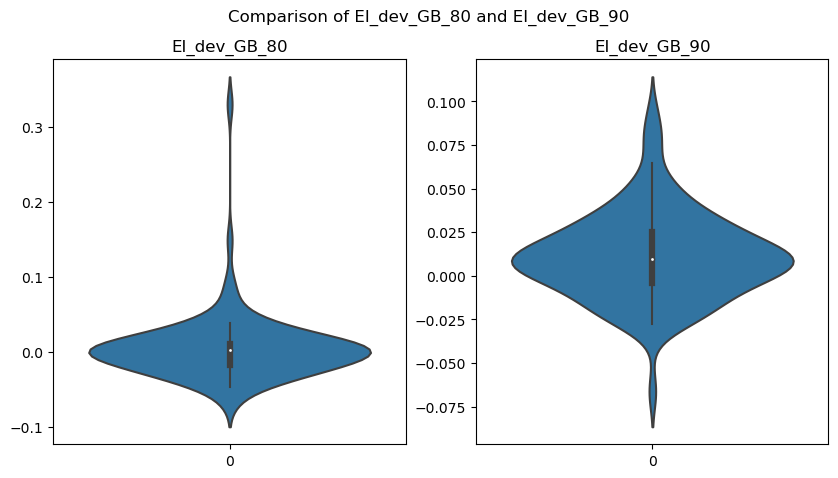

In [17]:
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a violin plot of EI_dev_GB_80
sns.violinplot(EI_dev_GB_80, ax=axes[0])
axes[0].set_title("EI_dev_GB_80")

# Create a violin plot of EI_dev_GB_90
sns.violinplot(EI_dev_GB_90, ax=axes[1])
axes[1].set_title("EI_dev_GB_90")

# Add a title to the figure
fig.suptitle("Comparison of EI_dev_GB_80 and EI_dev_GB_90")

# Show the plot
plt.show()

## Wilcoxon rank sum test

In [18]:
from scipy.stats import mannwhitneyu

# Compare EI_dev_GB_80 and EI_dev_GB_90
stat, p = mannwhitneyu(EI_dev_GB_80, EI_dev_GB_90)
print("\nComparing EI_dev_GB_80 and EI_dev_GB_90")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_GB_90 and EI_dev_GB_00
stat, p = mannwhitneyu(EI_dev_GB_90, EI_dev_GB_00)
print("\nComparing EI_dev_GB_90 and EI_dev_GB_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_USA_90 and EI_dev_USA_00
stat, p = mannwhitneyu(EI_dev_USA_90, EI_dev_USA_00)
print("\nComparing EI_dev_USA_90 and EI_dev_USA_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")

# Compare EI_dev_Meuse_90 and EI_dev_Meuse_00
stat, p = mannwhitneyu(EI_dev_Meuse_90, EI_dev_Meuse_00)
print("\nComparing EI_dev_Meuse_90 and EI_dev_Meuse_00")
print(f"Test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}\n")


print(f"The results of the Wilcoxon rank-sum test indicate whether there is a significant difference between two unpaired samples.")
print(f"The test statistic is the sum of the ranks of one sample in the combined sample of both groups. A larger test statistic indicates a larger difference between the two samples.")
print(f"The p-value is the probability of observing the data under the assumption that the null hypothesis is true, where the null hypothesis is usually that there is no difference between the two samples. If the p-value is less than a certain threshold (e.g. 0.05), it suggests that there is a significant difference between the two samples and the null hypothesis can be rejected.")


Comparing EI_dev_GB_80 and EI_dev_GB_90
Test statistic: 3355.0000
p-value: 0.0023


Comparing EI_dev_GB_90 and EI_dev_GB_00
Test statistic: 6103.0000
p-value: 0.0000


Comparing EI_dev_USA_90 and EI_dev_USA_00
Test statistic: 4403.0000
p-value: 0.0000


Comparing EI_dev_Meuse_90 and EI_dev_Meuse_00
Test statistic: 217.0000
p-value: 0.0001

The results of the Wilcoxon rank-sum test indicate whether there is a significant difference between two unpaired samples.
The test statistic is the sum of the ranks of one sample in the combined sample of both groups. A larger test statistic indicates a larger difference between the two samples.
The p-value is the probability of observing the data under the assumption that the null hypothesis is true, where the null hypothesis is usually that there is no difference between the two samples. If the p-value is less than a certain threshold (e.g. 0.05), it suggests that there is a significant difference between the two samples and the null hypothesis c

# Checken of de groepen verschillen

### Plaatjes maken van alle variabelen

In [19]:
cut1_Pa = 700
cut2_Pa = 1400

cut1_Epa = 500
cut2_Epa = 750

cut1_T = 10
cut2_T = 15

cut1_AI = 0.33
cut2_AI = 0.66

cut1_ST = 0
cut2_ST = 0.10

cut1_SI = 0.2
cut2_SI = 0.4

cut1_isdur = 4
cut2_isdur = 6

EI_dev_Pa = [[], [], []]     
EI_dev_Epa = [[], [], []] 
EI_dev_T = [[], [], []] 
EI_dev_AI = [[], [], []] 
EI_dev_ST = [[], [], []] 
EI_dev_SI = [[], [], []] 
EI_dev_isdur = [[], [], []] 

descriptors_names = ['Precipitation', 'Potential Evaporation', 'Temperature', 'Aridity Index', 'Seasonality Index', 'Interstorm duration', 'Seasonality Timing Index']
descriptors = ['Pa', 'Epa', 'T', 'AI', 'SI', 'is_dur', 'ST']
EI_dev_descriptors = EI_dev_Pa, EI_dev_Epa, EI_dev_T, EI_dev_AI, EI_dev_SI, EI_dev_isdur, EI_dev_ST

### Precipitation - plaatje en wilxocon

CAMELS GB
n1 48, n2 162, n3 75

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 4261.0000
p-value: 0.3137


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5979.0000
p-value: 0.8458

Group 1 has a mean of 0.01 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 10, n2 286, n3 42

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 1006.0000
p-value: 0.1114



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Comparing group 2 (yellow) and group 3 (red)
Test statistic: 6583.0000
p-value: 0.3151

Group 1 has a mean of 0.00 and std of 0.01
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.05
Meuse
n1 0, n2 64, n3 0
Group 2 has a mean of -0.06 and std of 0.07


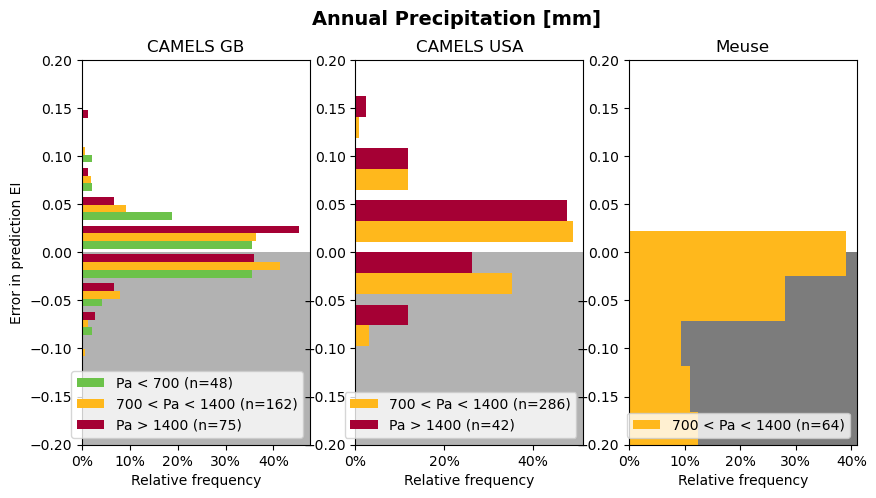

In [20]:
des = 'Pa'                
cut1, cut2 = cut1_Pa, cut2_Pa
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')


    
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:2]
        w = w[1:2]
        labels = labels[1:2]
        c = colors2[1:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Annual Precipitation [mm]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/P.png')  

### Potential evaporation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 54, n2 231, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 6478.0000
p-value: 0.6592

Group 1 has a mean of 0.01 and std of 0.05
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 0, n2 0, n3 338
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 64, n3 0
Group 2 has a mean of -0.06 and std of 0.07


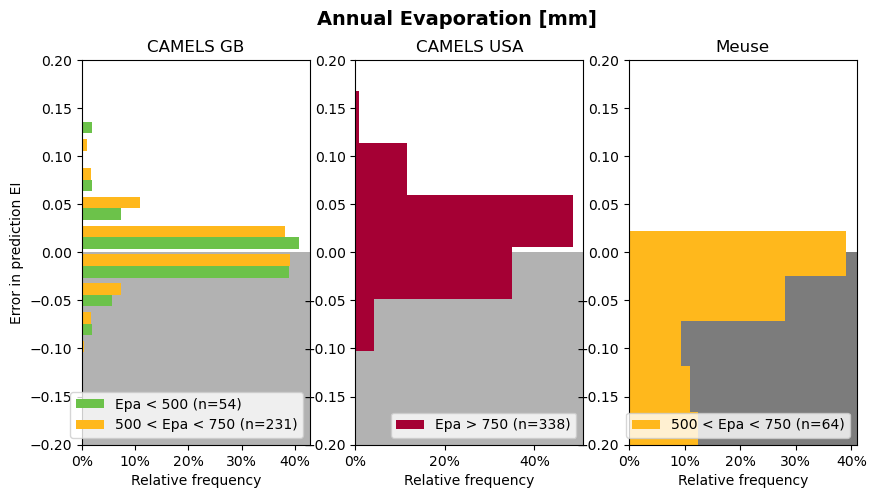

In [21]:
des = 'Epa'                
cut1, cut2 = cut1_Epa, cut2_Epa
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[2:3]
        w = w[2:3]
        labels = labels[2:3]
        c = colors2[2:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:2]
        w = w[1:2]
        labels = labels[1:2]
        c = colors2[1:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Annual Evaporation [mm]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/Ep.png')  

### Temperature

CAMELS GB
n1 246, n2 39, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 5090.0000
p-value: 0.5407

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of -0.00 and std of 0.02
CAMELS USA
n1 4, n2 282, n3 52


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Comparing group 1 (green) and group 2 (yellow)
Test statistic: 438.0000
p-value: 0.4596


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 7488.0000
p-value: 0.8080

Group 1 has a mean of -0.00 and std of 0.07
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 25, n2 39, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 342.0000
p-value: 0.0459

Group 1 has a mean of -0.08 and std of 0.07
Group 2 has a mean of -0.05 and std of 0.06


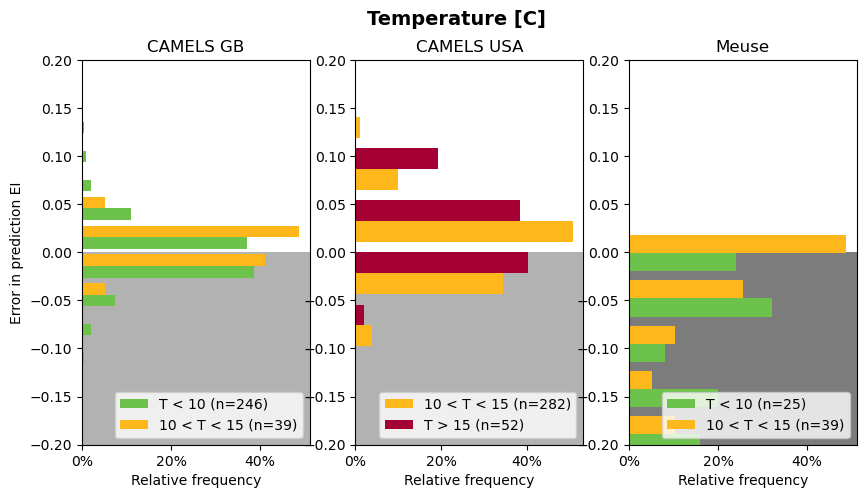

In [22]:
des = 'T'                
cut1, cut2 = cut1_T, cut2_T
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Temperature [C]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/T.png')  

### Aridity Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 60, n2 117, n3 108

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 3771.0000
p-value: 0.4195


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5842.0000
p-value: 0.3297

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 0, n2 28, n3 310

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 3831.0000
p-value: 0.3045

Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 27, n3 37

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 266.0000
p-value: 0.0015

Group 2 has a mean of -0.09 and std of 0.07
Group 3 has a mean of -0.04 and std of 0.06


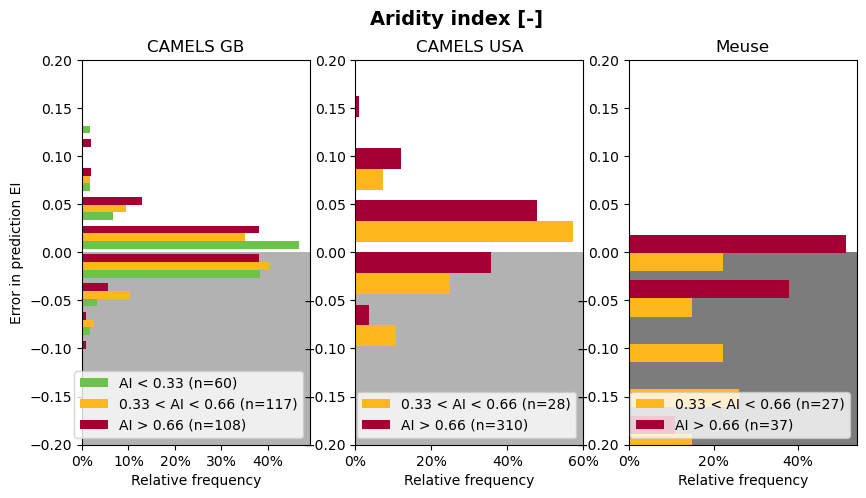

In [23]:
des = 'AI'                
cut1, cut2 = cut1_AI, cut2_AI
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Aridity index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/AI.png')  

### Interstorm duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 168, n2 117, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 9583.0000
p-value: 0.7209

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 42, n2 262, n3 34

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 5340.0000
p-value: 0.7601


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5087.0000
p-value: 0.1780

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.02
Meuse
n1 19, n2 45, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 252.0000
p-value: 0.0101

Group 1 has a mean of -0.09 and std of 0.06
Group 2 has a mean of -0.05 and std of 0.07


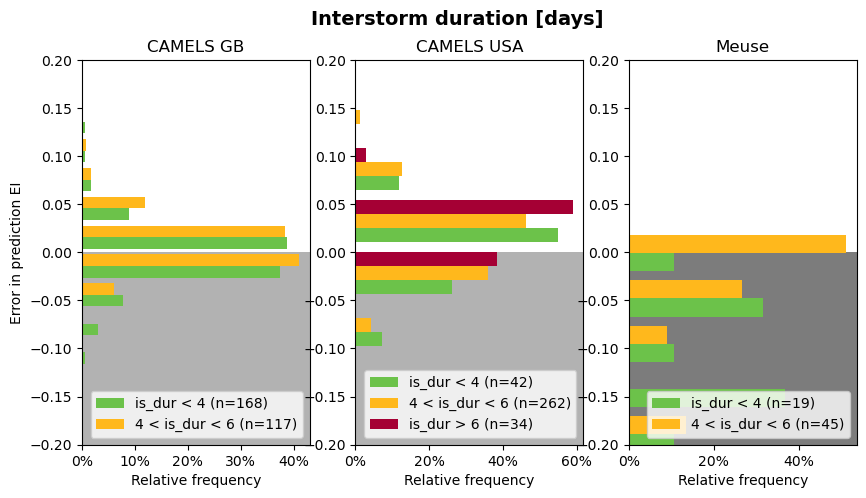

In [24]:
des = 'is_dur'                
cut1, cut2 = cut1_isdur, cut2_isdur
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Interstorm duration [days]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/Is_dur.png')  

### Seasonality index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 165, n2 120, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 10310.0000
p-value: 0.5511

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 170, n2 138, n3 30

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 11612.0000
p-value: 0.8798


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1789.0000
p-value: 0.2454

Group 1 has a mean of 0.02 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.03
Meuse
n1 57, n2 7, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 317.0000
p-value: 0.0118

Group 1 has a mean of -0.05 and std of 0.06
Group 2 has a mean of -0.13 and std of 0.06


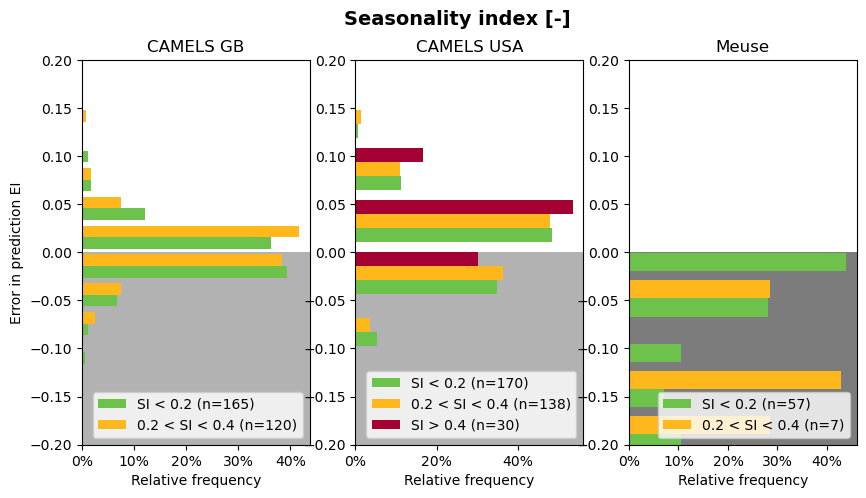

In [25]:
des = 'SI'                
cut1, cut2 = cut1_SI, cut2_SI
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:2]
        w = w[0:2]
        labels = labels[0:2]
        c = colors2[0:2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Seasonality index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/SI.png')  

### Seasonality timing index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 0, n2 69, n3 216

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 8475.0000
p-value: 0.0862

Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 54, n2 70, n3 214

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 1838.0000
p-value: 0.7952


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 7261.0000
p-value: 0.7017

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 64, n3 0
Group 2 has a mean of -0.06 and std of 0.07


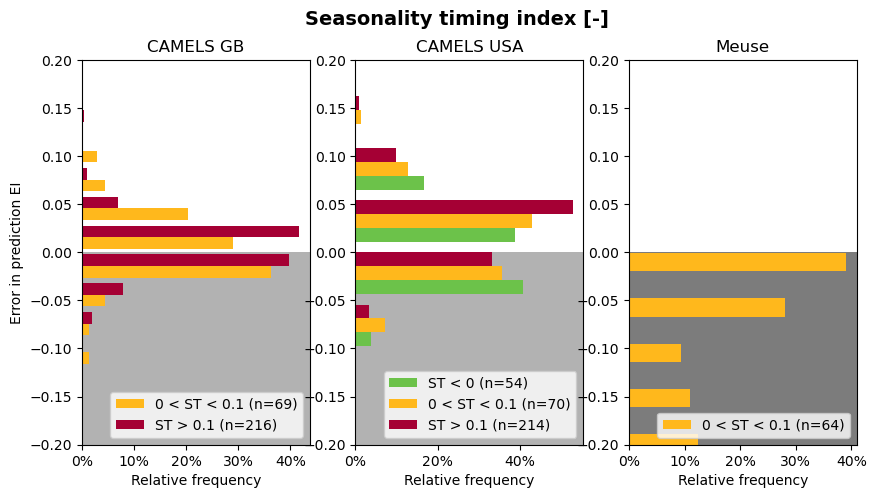

In [26]:
des = 'ST'                
cut1, cut2 = cut1_ST, cut2_ST
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
EI_dev_des_Meuse = [[], [], []]


for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                if catch_dat[f'{des}'] < cut1:
                    EI_dev_des[0].append(EI_dev)
                elif cut1 <= catch_dat[f'{des}'] < cut2:
                    EI_dev_des[1].append(EI_dev)
                elif cut2 <= catch_dat[f'{des}']:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if catch_dat[f'{des}'] < cut1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif cut1 <= catch_dat[f'{des}'] < cut2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif cut2 <= catch_dat[f'{des}']:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"{des} < {cut1} (n={n1})", f"{cut1} < {des} < {cut2} (n={n2})", f"{des} > {cut2} (n={n3})"]     
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=15, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors2[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:2]
        c = colors2[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')

        
    ax.legend(loc='lower right')
fig.suptitle('Seasonality timing index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/ST.png')  

## Change by change

### Precipitation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 42, n2 57, n3 186

Comparing group 1 (red) and group 2 (yellow)
Test statistic: 1030.0000
p-value: 0.2385


Comparing group 2 (yellow) and group 3 (green)
Test statistic: 6486.0000
p-value: 0.0107


Comparing group 1 (red) and group 3 (green)
Test statistic: 4206.0000
p-value: 0.4379

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.01 and std of 0.02
Group 3 has a mean of 0.00 and std of 0.04
CAMELS USA
n1 118, n2 52, n3 168

Comparing group 1 (red) and group 2 (yellow)
Test statistic: 3795.0000
p-value: 0.0140


Comparing group 2 (yellow) and group 3 (green)
Test statistic: 5360.0000
p-value: 0.0134


Comparing group 1 (red) and group 3 (green)
Test statistic: 15254.0000
p-value: 0.0000

Group 1 has a mean of 0.04 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.05
Group 3 has a mean of 0.00 and std of 0.03
Meuse
n1 20, n2 0, n3 19

Comparing group 1 (red) and group 3 (green)
Test statistic: 40.0000
p-value: 0.0000

Group 1 has a mean of -0.09 an

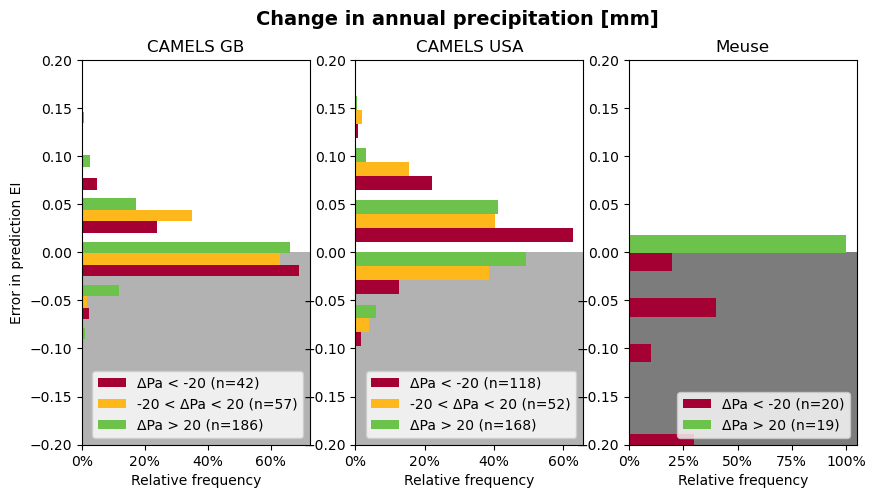

In [39]:
des = 'Pa'                
change1 = -20
change2 = 20

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (red) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (green)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[2])
            print("\nComparing group 1 (red) and group 3 (green)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 0:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 0:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 0:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0], EI_dev_des[2]
        w = w[0], w[2]
        labels = labels[0], labels[2]
        c = colors3[0], colors3[2]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in annual precipitation [mm]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dP.png')  

### Potential evaporation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 1, n2 197, n3 87

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 27.0000
p-value: 0.2828


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 6307.0000
p-value: 0.0004

Group 2 has a mean of 0.00 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.03
CAMELS USA
n1 103, n2 186, n3 49

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 9553.0000
p-value: 0.9701


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 3882.0000
p-value: 0.1111

Group 1 has a mean of 0.02 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.02 and std of 0.04
Meuse
n1 0, n2 10, n3 29

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 0.0000
p-value: 0.0000

Group 2 has a mean of -0.15 and std of 0.06
Group 3 has a mean of -0.01 and std of 0.02


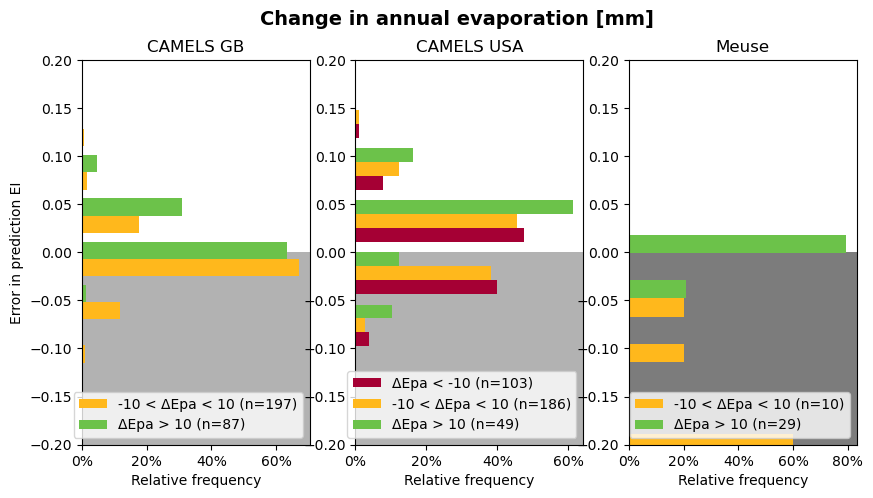

In [42]:
des = 'Epa'                
change1 = -10
change2 = 10

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
fig.suptitle('Change in annual evaporation [mm]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dEp.png')  

### Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 0, n2 97, n3 188

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 8163.0000
p-value: 0.1477

Group 2 has a mean of 0.00 and std of 0.05
Group 3 has a mean of 0.00 and std of 0.03
CAMELS USA
n1 18, n2 205, n3 115

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2451.0000
p-value: 0.0210


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 15897.0000
p-value: 0.0000

Group 1 has a mean of 0.05 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.00 and std of 0.03
Meuse
n1 0, n2 6, n3 33

Comparing group 2 (yellow) and group 3 (red)
Test statistic: 0.0000
p-value: 0.0001

Group 2 has a mean of -0.19 and std of 0.02
Group 3 has a mean of -0.02 and std of 0.03


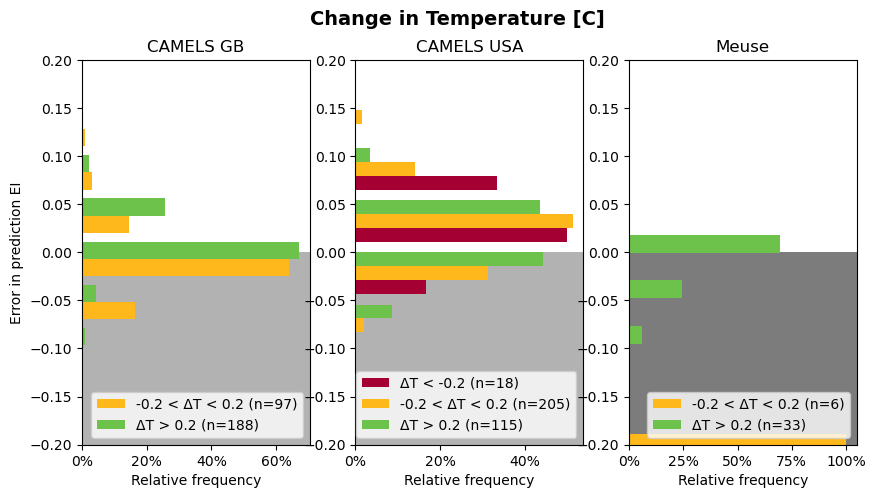

In [29]:
des = 'T'                
change1 = -0.2
change2 = 0.2

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in Temperature [C]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dT.png')  

### Aridity Index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 66, n2 196, n3 23

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 5841.0000
p-value: 0.2393


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 1766.0000
p-value: 0.0899

Group 1 has a mean of 0.00 and std of 0.05
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.02 and std of 0.03
CAMELS USA
n1 98, n2 166, n3 74

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 6411.0000
p-value: 0.0041


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 4463.0000
p-value: 0.0007

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.03 and std of 0.03
Meuse
n1 2, n2 19, n3 18

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2.0000
p-value: 0.0473


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 340.0000
p-value: 0.0000

Group 1 has a mean of -0.02 and std of 0.00
Group 2 has a mean of 0.00 and std of 0.01
Group 3 has a mean of -0.10 and

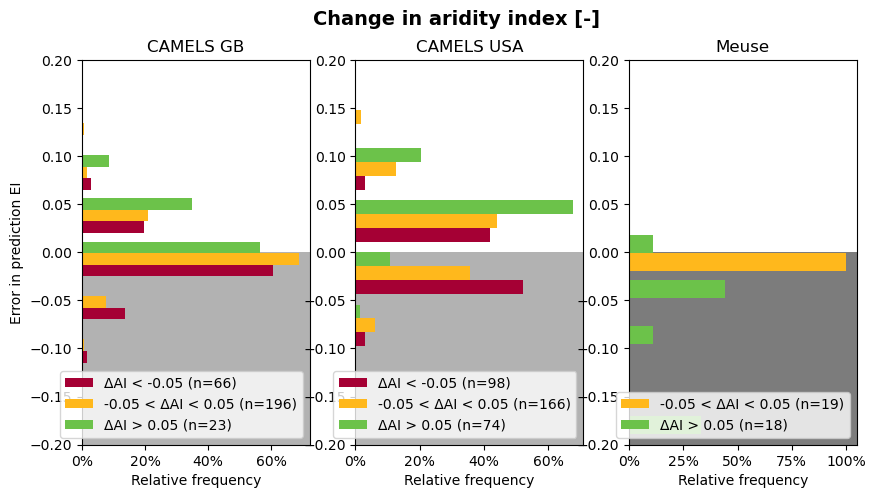

In [30]:
des = 'AI'                
change1 = -0.05
change2 = 0.05

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[1:3]
        w = w[1:3]
        labels = labels[1:3]
        c = colors3[1:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in aridity index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dAI.png')  

### Interstorm duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 9, n2 274, n3 2

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 1417.0000
p-value: 0.4475


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 245.0000
p-value: 0.8038

Group 1 has a mean of 0.01 and std of 0.04
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.00 and std of 0.00
CAMELS USA
n1 31, n2 268, n3 39

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 3144.0000
p-value: 0.0268


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 3675.0000
p-value: 0.0028

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.02 and std of 0.04
Group 3 has a mean of 0.03 and std of 0.03
Meuse
n1 19, n2 20, n3 0

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 340.0000
p-value: 0.0000

Group 1 has a mean of -0.00 and std of 0.01
Group 2 has a mean of -0.09 and std of 0.08


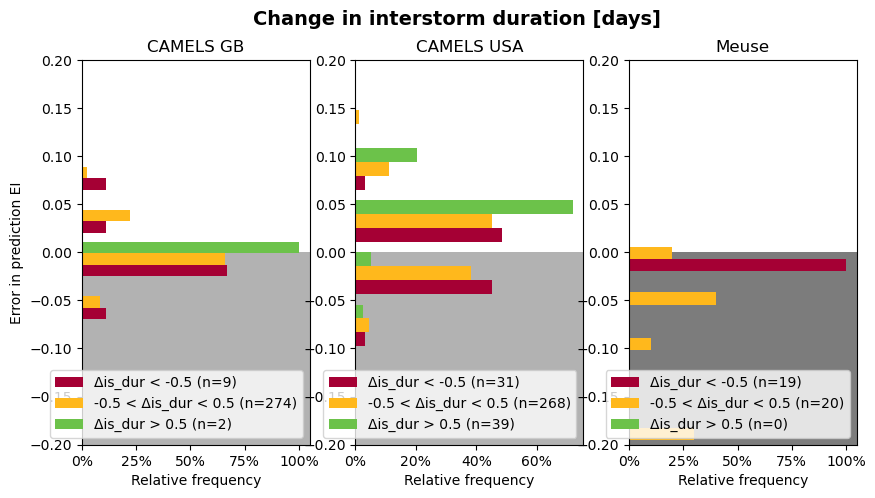

In [46]:
des = 'is_dur'                
change1 = -0.5
change2 = 0.5

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in interstorm duration [days]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dIs_dur.png')  

### Seasonality index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 73, n2 112, n3 100

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 3802.0000
p-value: 0.4226


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5601.0000
p-value: 0.9991

Group 1 has a mean of -0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.01 and std of 0.05
CAMELS USA
n1 99, n2 116, n3 123

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 7236.0000
p-value: 0.0010


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 6811.0000
p-value: 0.5460

Group 1 has a mean of 0.03 and std of 0.03
Group 2 has a mean of 0.01 and std of 0.04
Group 3 has a mean of 0.01 and std of 0.03
Meuse
n1 16, n2 7, n3 16

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 96.0000
p-value: 0.0081


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 44.0000
p-value: 0.4410

Group 1 has a mean of 0.00 and std of 0.01
Group 2 has a mean of -0.11 and std of 0.10
Group 3 has a mean of -0.06 

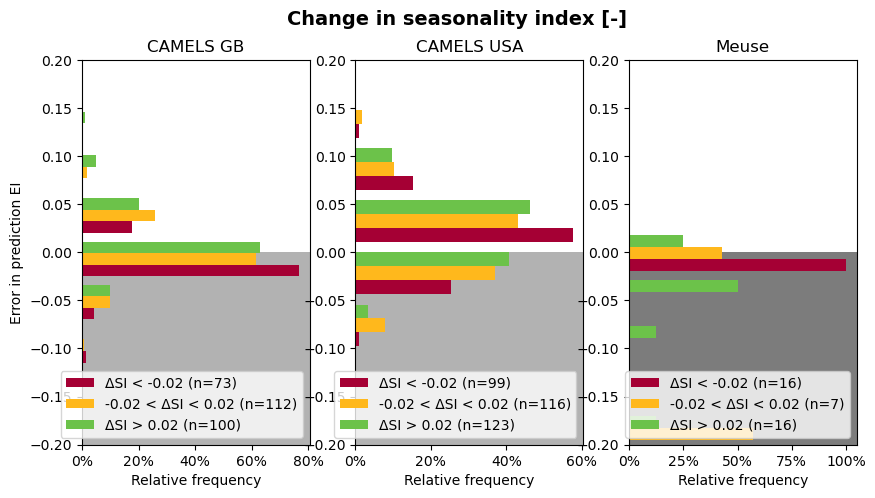

In [32]:
des = 'SI'                
change1 = -0.02
change2 = 0.02

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in seasonality index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dSI.png')  

### Seasonality timing index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAMELS GB
n1 62, n2 72, n3 151

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2383.0000
p-value: 0.5019


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 5085.0000
p-value: 0.4365

Group 1 has a mean of 0.00 and std of 0.03
Group 2 has a mean of 0.00 and std of 0.03
Group 3 has a mean of 0.01 and std of 0.04
CAMELS USA
n1 122, n2 46, n3 170

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 2114.0000
p-value: 0.0139


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 3293.0000
p-value: 0.1011

Group 1 has a mean of 0.00 and std of 0.04
Group 2 has a mean of 0.02 and std of 0.03
Group 3 has a mean of 0.03 and std of 0.04
Meuse
n1 21, n2 10, n3 8

Comparing group 1 (green) and group 2 (yellow)
Test statistic: 204.0000
p-value: 0.0000


Comparing group 2 (yellow) and group 3 (red)
Test statistic: 64.0000
p-value: 0.0359

Group 1 has a mean of 0.00 and std of 0.01
Group 2 has a mean of -0.07 and std of 0.08
Group 3 has a mean of -0.13 a

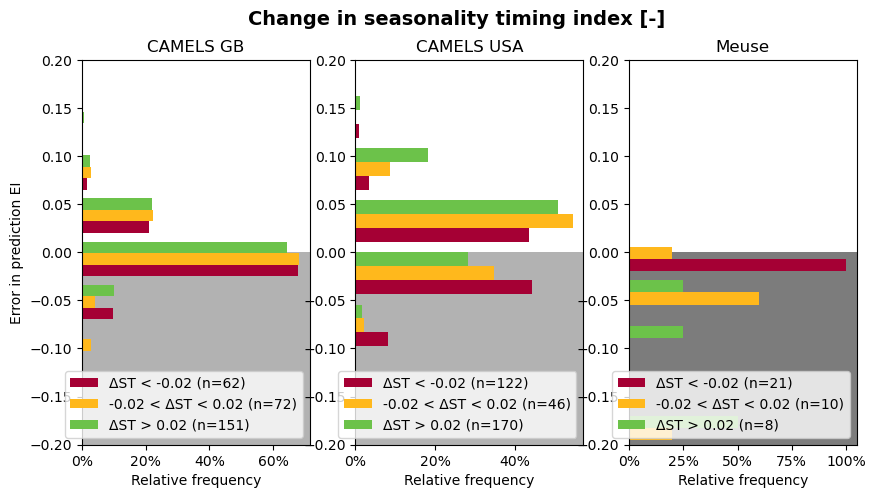

In [33]:
des = 'ST'                
change1 = -0.02
change2 = 0.02

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for u in range(len(datasets)):
    if u == 0 or u == 1:
        ax = axes[u]
    elif u == 2:
        ax = axes[2]
    dataset = datasets[u]
    yrsl = yrsls[u]
    EI_dev_des = [[], [], []] 
    EI_dev_des_Meuse = [[], [], []]
    w = ["", "", ""]
    ax.set_ylim(-0.2, 0.2)
    ax.set_xlabel('Relative frequency')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
    ax.axhspan(-0.2, -0.0, facecolor='black', alpha=0.3)
    for j in range(len(yrsl)):  
        if j > 0:
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']  
                des_change = catch_dat[f'{des}_change {yrsl[j]}'].item()
                    
                if des_change < change1:
                    EI_dev_des[0].append(EI_dev)
                elif change1 <= des_change and des_change < change2:
                    EI_dev_des[1].append(EI_dev)
                elif change2 <= des_change:
                    EI_dev_des[2].append(EI_dev)
                        
                if u == 2 or u == 3:
                    if des_change < change1:
                        EI_dev_des_Meuse[0].append(EI_dev)
                    elif change1 <= des_change and des_change < change2:
                        EI_dev_des_Meuse[1].append(EI_dev)
                    elif change2 <= des_change:
                        EI_dev_des_Meuse[2].append(EI_dev)
                            
                    EI_dev_des = EI_dev_des_Meuse
    for a in range(3):
        w[a] = np.ones_like(EI_dev_des[a])/(len(EI_dev_des[a]))                    
                
    n1, n2, n3 = len(EI_dev_des[0]), len(EI_dev_des[1]), len(EI_dev_des[2])  
    labels = [f"Δ{des} < {change1} (n={n1})", f"{change1} < Δ{des} < {change2} (n={n2})", f"Δ{des} > {change2} (n={n3})"]
    
    ## WILCOXON
    
    if u == 0 or u == 1 or u == 3:
        print("\033[1m\033[4m" + dataset_names[u] + "\033[0m")
        print(f'n1 {n1}, n2 {n2}, n3 {n3}')
        if n1 and n2 > 0:
            stat, p = mannwhitneyu(EI_dev_des[0], EI_dev_des[1])
            print("\nComparing group 1 (green) and group 2 (yellow)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
        if n2 and n3 > 0:
            stat, p = mannwhitneyu(EI_dev_des[1], EI_dev_des[2])
            print("\nComparing group 2 (yellow) and group 3 (red)")
            print(f"Test statistic: {stat:.4f}")
            print(f"p-value: {p:.4f}\n")
            
        if n1 > 1:    
            mean_n1 = np.mean(EI_dev_des[0])
            std_n1 = statistics.stdev(EI_dev_des[0])
            print(f'Group 1 has a mean of {mean_n1:.2f} and std of {std_n1:.2f}')

        if n2 > 1:    
            mean_n2 = np.mean(EI_dev_des[1])
            std_n2 = statistics.stdev(EI_dev_des[1])
            print(f'Group 2 has a mean of {mean_n2:.2f} and std of {std_n2:.2f}')

        if n3 > 1:    
            mean_n3 = np.mean(EI_dev_des[2])
            std_n3 = statistics.stdev(EI_dev_des[2])
            print(f'Group 3 has a mean of {mean_n3:.2f} and std of {std_n3:.2f}')
    
    if u == 0:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=10, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS GB')
        ax.set_ylabel('Error in prediction EI')
        
    if u == 1:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('CAMELS USA')

        
    if u == 3:
        EI_dev_des = EI_dev_des[0:3]
        w = w[0:3]
        labels = labels[0:3]
        c = colors3[0:3]
        ax.hist(EI_dev_des, bins=5, alpha = 1, color = c, label=labels, weights=w, orientation='horizontal')
        ax.set_title('Meuse')
        
    ax.legend(loc='lower right')
    
fig.suptitle('Change in seasonality timing index [-]', fontweight='bold', fontsize=14)
plt.savefig(f'2_Output/{output}/dST.png')  

# Combineren afbeeldingen

In [34]:
images = ['P.png', 'Ep.png', 'T.png', 'AI.png', 'Is_dur.png', 'SI.png', 'ST.png']

fig = plt.figure(figsize=(9, 30))
for i, image_name in enumerate(images):
    image = plt.imread(f'2_Output/{output}/{image_name}')
    plt.subplot(7, 1, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.savefig(f'2_Output/{output}/Total_groups.png')  
plt.close()
# plt.show()

In [35]:
images = ['dP.png', 'dEp.png', 'dT.png', 'dAI.png', 'dIs_dur.png', 'dSI.png', 'dST.png']

fig = plt.figure(figsize=(9, 30))
for i, image_name in enumerate(images):
    image = plt.imread(f'2_Output/{output}/{image_name}')
    plt.subplot(7, 1, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.savefig(f'2_Output/{output}/Total_groups_change.png')  
plt.close()
# plt.show()